# Jogos Olímpicos

## Análise exploratória com os dados dos Jogos Olímpicos 


##### - Evolução da participação feminina (mundial e na equipe olímpica brasileira)
##### - Share de medalhas ( top 3 países no quadro de medalhas vs o resto)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
jogos = pd.read_csv('C:\\Users\\Caio\\Desktop\\Olimpiadas\\Dados\\athlete_events.csv')

regioes = pd.read_csv('C:\\Users\\Caio\\Desktop\\Olimpiadas\\Dados\\noc_regions.csv')

In [3]:
dados = pd.merge(jogos, regioes, how = 'left', on = 'NOC')

## 1.0 - Número de Atletas e Participação das Mulheres nos Jogos Olímpicos

In [4]:
atletas = dados[dados['Season'] == 'Summer']

atletas = atletas.drop_duplicates(subset=['ID', 'Year'])

atletas = atletas.groupby(['NOC', 'Year', 'Sex'])['ID'].count().reset_index()

In [5]:
atletas = atletas.pivot_table(values = 'ID', index = ['NOC', 'Year'], columns = 'Sex', aggfunc = 'sum').fillna(0).reset_index()

atletas = atletas.groupby('Year')[['F','M']].sum().reset_index()

atletas['total'] = atletas['M'] + atletas['F']

atletas['proporcao_mulher'] = (atletas['F'] / atletas['total']*100)

atletas['proporcao_mulher'] = atletas['proporcao_mulher'].round(1)

atletas

Sex,Year,F,M,total,proporcao_mulher
0,1896,0.0,176.0,176.0,0.0
1,1900,23.0,1201.0,1224.0,1.9
2,1904,6.0,644.0,650.0,0.9
3,1906,6.0,835.0,841.0,0.7
4,1908,44.0,1980.0,2024.0,2.2
5,1912,53.0,2356.0,2409.0,2.2
6,1920,78.0,2598.0,2676.0,2.9
7,1924,156.0,3100.0,3256.0,4.8
8,1928,312.0,2935.0,3247.0,9.6
9,1932,201.0,1721.0,1922.0,10.5


In [17]:
#for i, x in enumerate(atletas):
#    if atletas[x].dtype == 'float64':
#        atletas[x] = atletas[x].astype(int)
    

In [6]:
atletas

Sex,Year,F,M,total,proporcao_mulher
0,1896,0.0,176.0,176.0,0.0
1,1900,23.0,1201.0,1224.0,1.9
2,1904,6.0,644.0,650.0,0.9
3,1906,6.0,835.0,841.0,0.7
4,1908,44.0,1980.0,2024.0,2.2
5,1912,53.0,2356.0,2409.0,2.2
6,1920,78.0,2598.0,2676.0,2.9
7,1924,156.0,3100.0,3256.0,4.8
8,1928,312.0,2935.0,3247.0,9.6
9,1932,201.0,1721.0,1922.0,10.5


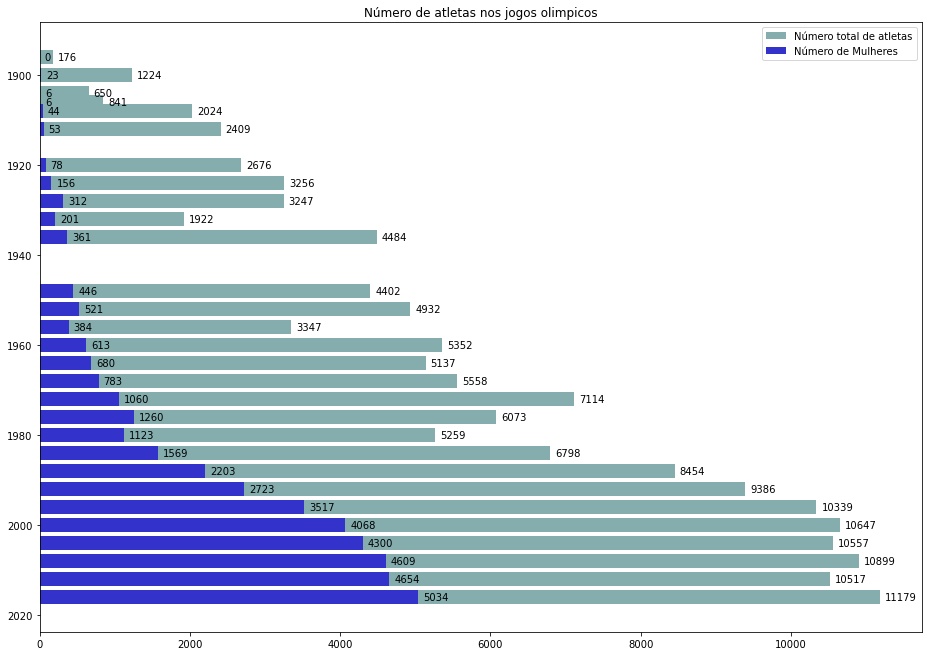

In [75]:
fig, ax = plt.subplots(figsize = (13,9))

ax.barh(atletas['Year'], atletas['total'],height=3.2, align='center', color = '#85adad')
ax.barh(atletas['Year'], atletas['F'],height=3.2, align='center', color = '#3333cc')


ax.invert_yaxis()  # labels read top-to-bottom
plt.tight_layout()
plt.title('Número de atletas nos jogos olimpicos')
plt.legend(['Número total de atletas', 'Número de Mulheres'])



rects = ax.patches

# obrigado stackoverflow
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'

    
    if x_value < 0:
        space *= -1
        ha = 'right'

    label = "{:.0f}".format(x_value)

    
    plt.annotate(
        label,                     
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',               
        ha=ha,)


Text(0.5, 0, '')

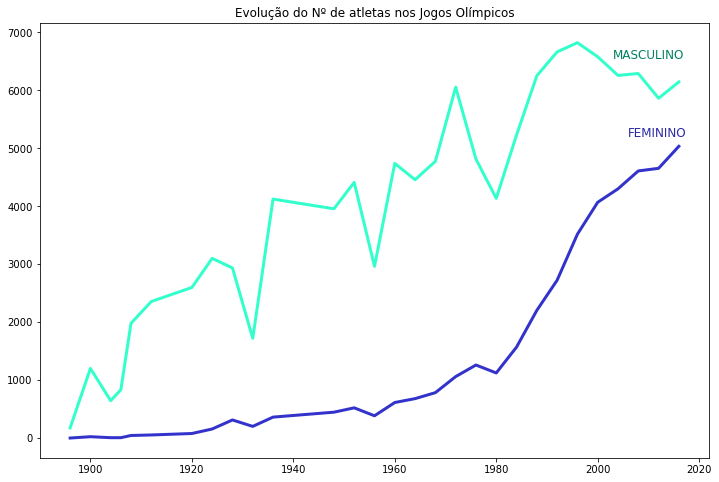

In [77]:
plt.subplots(figsize = (12,8))

g = sns.lineplot(x="Year", y="M", data=atletas, linewidth = 3, color = '#33ffcc')
g = sns.lineplot(x="Year", y="F", data=atletas, linewidth = 3, color = '#3333cc')


plt.text(2003,6550, 'MASCULINO', fontsize = 12, color = '#008060')
plt.text(2006,5200, 'FEMININO', fontsize = 12, color = '#2929a3')


plt.title('Evolução do Nº de atletas nos Jogos Olímpicos')
plt.ylabel('')
plt.xlabel("")

Text(0.5, 0, '')

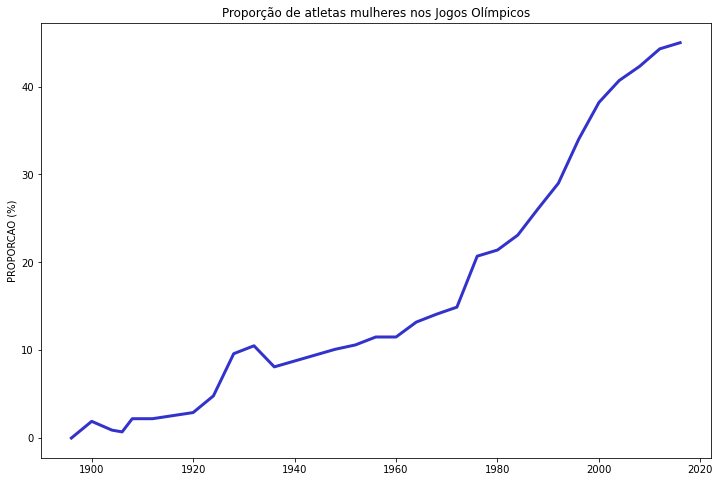

In [78]:
plt.subplots(figsize = (12,8))

g = sns.lineplot(x="Year", y="proporcao_mulher", data=atletas, linewidth = 3, color = '#3333cc')


plt.title('Proporção de atletas mulheres nos Jogos Olímpicos')
plt.ylabel('PROPORCAO (%)')
plt.xlabel("")

## 1.1 Participação Feminina na equipe olímpica brasileira

In [79]:
mulheres_bra = dados[(dados['Season'] == 'Summer') & (dados['NOC'] == 'BRA')]

mulheres_bra = mulheres_bra.drop_duplicates(subset=['Name', 'Year'])

mulheres_bra = mulheres_bra.groupby(['NOC', 'Year', 'Sex'])['Name'].count().reset_index()


In [80]:
mulheres_bra = mulheres_bra.pivot_table(values = 'Name', index = ['NOC', 'Year'], columns = 'Sex', aggfunc = 'sum').fillna(0).reset_index()

#mulheres_bra = mulheres_bra.groupby('Year')[['F','M']].sum().reset_index()

mulheres_bra['total'] = mulheres_bra['M'] + mulheres_bra['F']

mulheres_bra['proporcao_mulher'] = (mulheres_bra['F'] / mulheres_bra['total']*100)

mulheres_bra['proporcao_mulher'] = mulheres_bra['proporcao_mulher'].round(1)

mulheres_bra

Sex,NOC,Year,F,M,total,proporcao_mulher
0,BRA,1900,0.0,1.0,1.0,0.0
1,BRA,1920,0.0,19.0,19.0,0.0
2,BRA,1924,0.0,12.0,12.0,0.0
3,BRA,1932,1.0,58.0,59.0,1.7
4,BRA,1936,6.0,67.0,73.0,8.2
5,BRA,1948,11.0,59.0,70.0,15.7
6,BRA,1952,5.0,92.0,97.0,5.2
7,BRA,1956,1.0,46.0,47.0,2.1
8,BRA,1960,1.0,71.0,72.0,1.4
9,BRA,1964,1.0,60.0,61.0,1.6


In [45]:
#for i, x in enumerate(mulheres_bra):
#    if mulheres_bra[x].dtype == 'float64':
#        mulheres_bra[x] = mulheres_bra[x].astype(int)

In [81]:
mulheres_bra = mulheres_bra.rename(columns = {'F':'F_bra', 'M':'M_bra', 'total':'total_bra', 'proporcao_mulher': 'prop_bra'})


mulheres = pd.merge(atletas, mulheres_bra,how='left', on = 'Year')


mulheres = mulheres.fillna({'F_bra':0, 'M_bra': 0, 'total_bra': 0, 'prop_bra':0, 'NOC':'BRA'})


Text(0.5, 0, '')

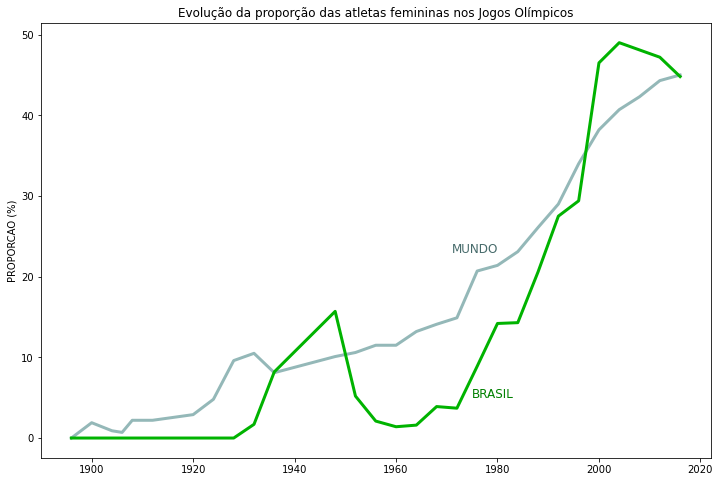

In [83]:
plt.subplots(figsize = (12,8))

g = sns.lineplot(x="Year", y="proporcao_mulher", data=mulheres, linewidth = 3, color = "#94b8b8")
g = sns.lineplot(x="Year", y="prop_bra", data=mulheres, linewidth = 3, color = '#00b300')


plt.text(1975,5, 'BRASIL', fontsize = 12, color = '#008000')
plt.text(1971,23, 'MUNDO', fontsize = 12, color = '#476b6b')


plt.title('Evolução da proporção das atletas femininas nos Jogos Olímpicos')
plt.ylabel('PROPORCAO (%)')
plt.xlabel("")

Text(0.5, 0, '')

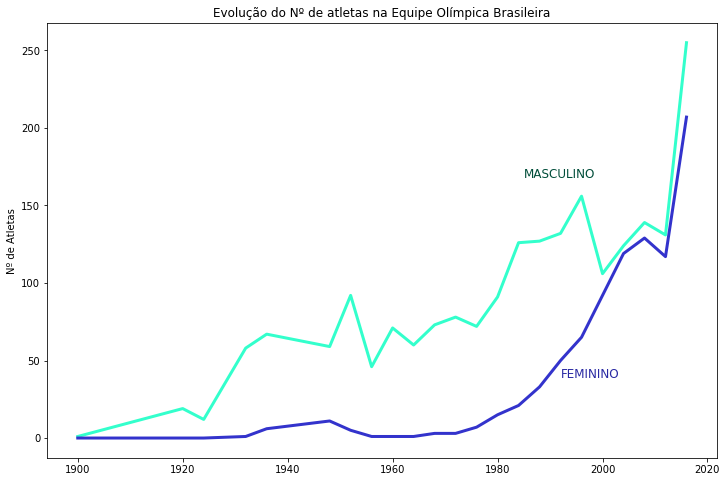

In [84]:
plt.subplots(figsize = (12,8))

g = sns.lineplot(x="Year", y="M_bra", data=mulheres_bra, linewidth = 3, color = '#33ffcc')
g = sns.lineplot(x="Year", y="F_bra", data=mulheres_bra, linewidth = 3, color = '#3333cc')

plt.text(1985,168, 'MASCULINO', fontsize = 12, color = '#004d39')
plt.text(1992,39, 'FEMININO', fontsize = 12, color = '#2929a3')


plt.title('Evolução do Nº de atletas na Equipe Olímpica Brasileira')
plt.ylabel('Nº de Atletas')
plt.xlabel("")

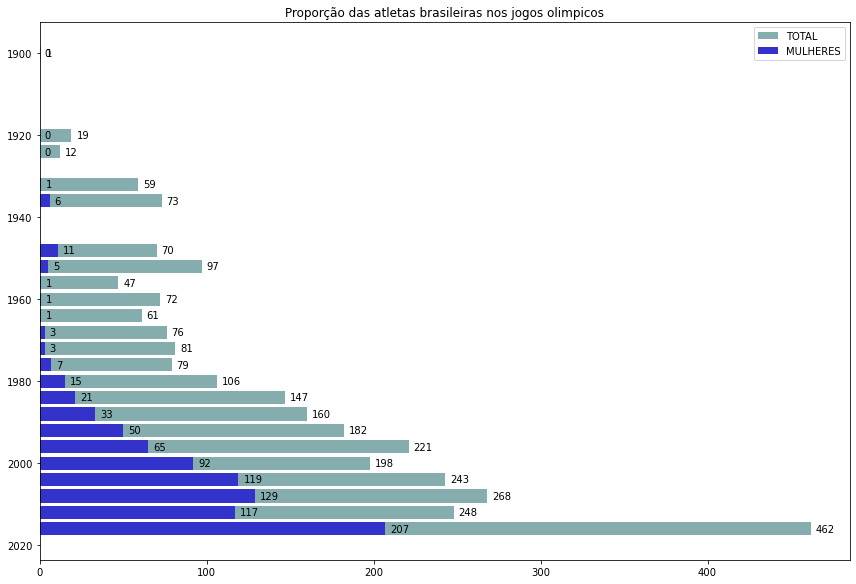

In [85]:
fig, ax = plt.subplots(figsize = (12,8))

ax.barh(mulheres_bra['Year'], mulheres_bra['total_bra'],height=3.2, align='center', color = '#85adad')
ax.barh(mulheres_bra['Year'], mulheres_bra['F_bra'],height=3.2, align='center', color = '#3333cc')

ax.invert_yaxis()  # labels read top-to-bottom


# THANK YOU STACKOVERFLOW
rects = ax.patches


for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = "{:.0f}".format(x_value)

    plt.annotate(
        label,                     
        (x_value, y_value),        
        xytext=(space, 0),         
        textcoords="offset points",
        va='center',               
        ha=ha,)


plt.tight_layout()
plt.title('Proporção das atletas brasileiras nos jogos olimpicos')
plt.legend(['TOTAL', 'MULHERES'])

## 2.0 - Share de medalhas

### E com relação as medalhas ? Será que com o passar dos anos a porção de medalhas conquistadas pelos 3 primeiros países do quadro diminuiu?

In [43]:
medalhas_totais = dados.dropna(subset = ['Medal'])

medalhas_totais = medalhas_totais[['ID', 'Name', 'NOC', 'Year', 'Season', 'Sport', 'Event', 'Medal']]

medalhas_totais = medalhas_totais[medalhas_totais['Season'] == 'Summer']

In [44]:
medalhas_totais = medalhas_totais.groupby(['NOC', 'Year', 'Event'])['Medal'].nunique().reset_index()

medalhas_totais = medalhas_totais.groupby(['NOC', 'Year']).sum().reset_index()

medalhas_totais = medalhas_totais.groupby('Year')[['Medal']].sum().reset_index().rename(columns = {'Medal': 'Medalhas_totais'})

In [45]:
medalhas_totais

,Year,Medalhas_totais
0,1896,120
1,1900,291
2,1904,279
3,1906,224
4,1908,320
5,1912,316
6,1920,446
7,1924,391
8,1928,356
9,1932,370


#### Selecionando os 3 primeiros países no quadro de medalhas

In [46]:
podio = dados.dropna(subset = ['Medal'])

podio = podio[['ID', 'Name', 'NOC', 'Year', 'Season', 'Sport', 'Event', 'Medal']]

podio = podio[podio['Season'] == 'Summer']

In [47]:
podio = podio.groupby(['NOC', 'Year', 'Event'])['Medal'].nunique().reset_index()

podio = podio.groupby(['NOC', 'Year'])[['Medal']].sum().reset_index()

podio = podio.sort_values(['Year', 'Medal'], ascending = False).groupby('Year').head(3)

podio = podio.groupby('Year')[['Medal']].sum().reset_index()

In [48]:
podio = podio.groupby('Year')[['Medal']].sum().reset_index()

#### Juntando as duas bases

In [49]:
share_total = pd.merge(podio, medalhas_totais, how='left', on = 'Year')

share_total = share_total.dropna()

share_total['Medal'] = share_total['Medal'].astype(int)

share_total['proporcao'] = (share_total['Medal']/share_total['Medalhas_totais']*100).round(1)

In [50]:
share_total

,Year,Medal,Medalhas_totais,proporcao
0,1896,77,120,64.2
1,1900,198,291,68.0
2,1904,252,279,90.3
3,1906,101,224,45.1
4,1908,214,320,66.9
5,1912,169,316,53.5
6,1920,202,446,45.3
7,1924,176,391,45.0
8,1928,120,356,33.7
9,1932,171,370,46.2


Text(0.5, 0, '')

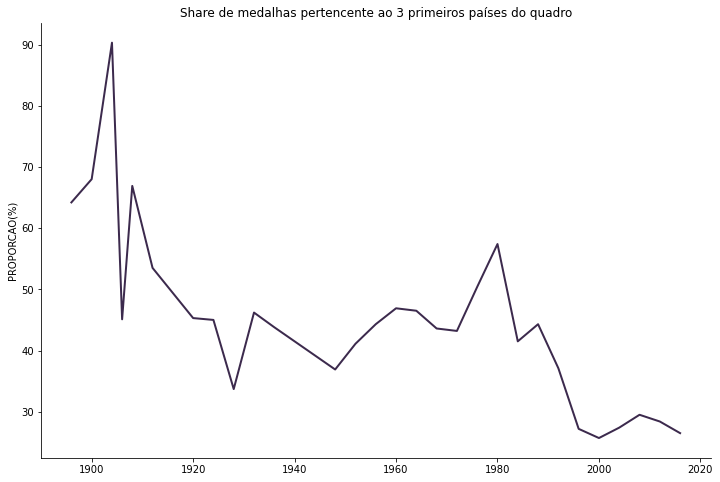

In [86]:
plt.subplots(figsize = (12,8))

g = sns.lineplot(x="Year", y="proporcao", data=share_total, linewidth = 2, color = '#3c2a4d')

g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)



plt.title('Share de medalhas pertencente ao 3 primeiros países do quadro')
plt.ylabel('PROPORCAO(%)')
plt.xlabel(None)

### E com relação ao Ouro ? Será que o número de países que conquistou 1 medalha de ouro aumentou com o passar dos anos ?

In [52]:
ouro = dados.dropna(subset = ['Medal'])

ouro = ouro[['ID', 'Name', 'NOC', 'Year', 'Season', 'Sport', 'Event', 'Medal']]

ouro = ouro[(ouro['Season'] == 'Summer') & (ouro['Medal'] == 'Gold') ]

In [53]:
ouro = ouro.groupby(['NOC', 'Year', 'Event'])['Medal'].nunique().reset_index()

ouro = ouro.groupby(['NOC', 'Year'])[['Medal']].sum().reset_index()

qtd_paisesouro = ouro.groupby('Year').agg({'NOC':'count'}).reset_index()

qtd_paisesouro.rename(columns={'NOC':'QtdPaisesOuro'},inplace=True)

ouro = ouro.sort_values(['Year', 'Medal'], ascending = False).groupby('Year').head(3)

ouro = ouro.groupby('Year')[['Medal']].sum().reset_index()

In [54]:
ouro_paises = ouro.merge(qtd_paisesouro, how='left', on='Year')

In [55]:
ouro_paises

,Year,Medal,QtdPaisesOuro
0,1896,28,10
1,1900,68,18
2,1904,84,10
3,1906,35,15
4,1908,86,14
5,1912,60,16
6,1920,76,15
7,1924,73,21
8,1928,41,29
9,1932,67,19


Text(0.5, 0, '')

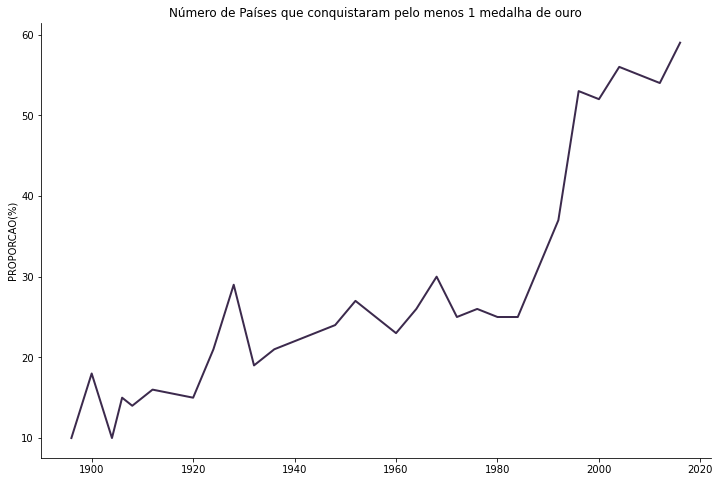

In [87]:
plt.subplots(figsize = (12,8))

g = sns.lineplot(x="Year", y="QtdPaisesOuro", data=ouro_paises, linewidth = 2, color = '#3c2a4d')

g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)



plt.title('Número de Países que conquistaram pelo menos 1 medalha de ouro')
plt.ylabel('PROPORCAO(%)')
plt.xlabel(None)

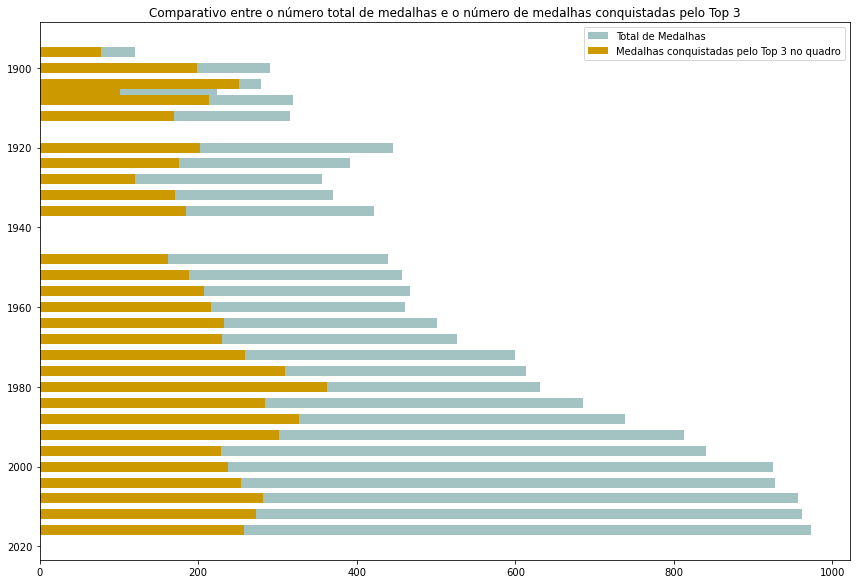

In [89]:
fig, ax = plt.subplots(figsize = (12,8))

ax.barh(share_total['Year'], share_total['Medalhas_totais'],height=2.5, align='center', color = '#a3c2c2')
ax.barh(share_total['Year'], share_total['Medal'],height=2.5, align='center', color = '#cc9900')

ax.invert_yaxis() 
plt.tight_layout()
plt.title('Comparativo entre o número total de medalhas e o número de medalhas conquistadas pelo Top 3')
plt.legend(['Total de Medalhas', 'Medalhas conquistadas pelo Top 3 no quadro'])

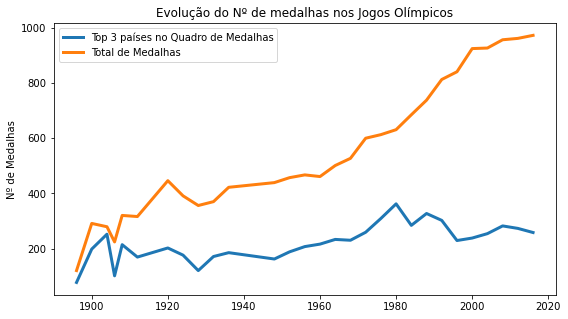

In [58]:
fig, ax = plt.subplots(figsize = (9,5))

g = sns.lineplot(x="Year", y="Medal", data=share_total, linewidth = 3)
g = sns.lineplot(x="Year", y="Medalhas_totais", data=share_total, linewidth = 3)

plt.title('Evolução do Nº de medalhas nos Jogos Olímpicos')
plt.ylabel('Nº de Medalhas')
plt.xlabel("")
plt.legend(['Top 3 países no Quadro de Medalhas','Total de Medalhas'])

### Número de países participando dos Jogos Olímpicos

In [59]:
paises = dados[dados['Season'] == 'Summer'].groupby('Year')[['NOC']].nunique().reset_index()

In [60]:
paises

,Year,NOC
0,1896,12
1,1900,31
2,1904,15
3,1906,21
4,1908,22
5,1912,29
6,1920,29
7,1924,45
8,1928,46
9,1932,47


Text(0, 0.5, 'Nº')

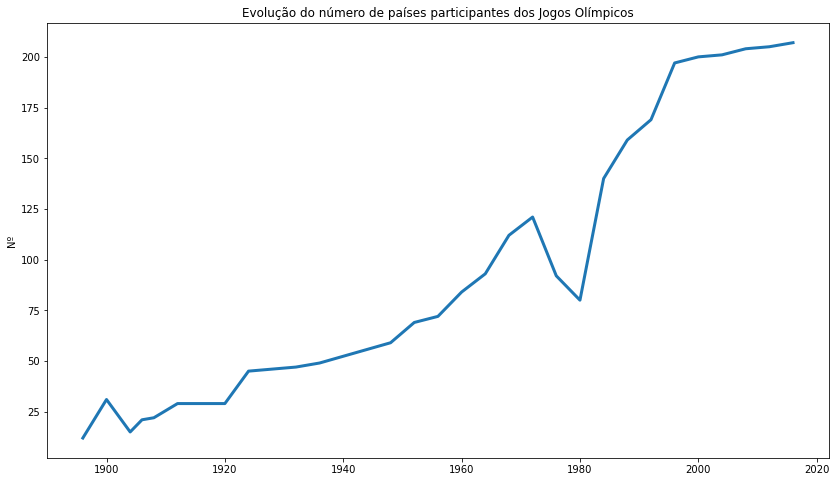

In [73]:
fig, axes = plt.subplots(1,1, figsize=(14, 8))


# 1 grafico
plot = sns.lineplot(x="Year", y="NOC", data=paises, linewidth = 3)
plot.set_title('Evolução do número de países participantes dos Jogos Olímpicos')
plot.set_xlabel('')
plot.set_ylabel('Nº')

